In [111]:
# note: datahub.io has good datasets

In [112]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [113]:
# TO SWITCH DATASETS:
file = 'houses.csv'
to_predict = 'price'

In [114]:
# load the data
df = pd.read_csv(f'data/{file}')
print(df.shape)

# drop the rows with missing values
df = df.fillna(df.mean(numeric_only=True))

# for cars.csv:
target = df[[to_predict]]
predictors = df.drop(to_predict, axis=1).select_dtypes(exclude=object)

(100, 5)


In [115]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(predictors, target, train_size=0.7, test_size=0.3)

In [116]:
# scale/normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
# convert to numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [118]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train shape: (70, 4)
X_test.shape: (30, 4)
y_train.shape: (70, 1)
y_test.shape: (30, 1)


In [119]:
# initial parameters
m, n = X_train.shape
w_init = np.zeros((n, 1))
b_init = 0.0

print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")


w_init shape: (4, 1), b_init type: <class 'float'>


The model's prediction with multiple variables is given by the linear model:
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

In [120]:
def predict(X, w, b):
  '''
  Predict values using weights and inputs
  
  Args:
  X (ndarray (m,n)) : examples with multiple features
  w (ndarray (n,))  : model parameters
  b (scalar)        : model parameter

  Returns:
  p (scalar)        : prediction 
  '''

  p = np.dot(X, w) + b
  p = p.reshape(-1,1)

  return p

In [121]:
predict(X_train, w_init, b_init).shape

(70, 1)

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

In [122]:
def compute_cost(X, y, w, b):
  '''
  Computes cost for a model using current parameters
  
  Args:
  X (ndarray (m,n)) : data, m examples with n features
  y (ndarray (m,))  : target values
  w (ndarray (n,))  : model parameters
  b (scalar)        : model parameter
  
  Returns:
  cost (scalar)     : cost
  '''

  m,_ = X.shape
  pred = predict(X, w, b)
  cost = ((pred - y)**2).sum()
  cost = cost / (2 * m)

  return cost

In [123]:
compute_cost(X_train, y_train, w_init, b_init)

71283.29983905713

Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [124]:
def compute_gradient(X, y, w, b):
  '''
  Computes the gradient(slope of cost function)

  Args:
  X (ndarray (m,n))    : data, m examples with n features
  y (ndarray (m,))     : target values
  w (ndarray (n,))     : model parameters
  b (scalar)           : model parameter

  Returns:
  dj_dw (ndarray (n,)) : gradient of the cost w.r.t. the parameters w
  dj_db (scalar)       : gradient of the cost w.r.t. the parameter b
  '''

# non-vectorized implementation
#   m,n = X.shape           #(number of examples, number of features)
#   dj_dw = np.zeros(n,)
#   dj_db = 0.

#   for i in range(m):                             
#       err = predict(X, w, b)[i] - y[i]   
#       for j in range(n):                         
#           dj_dw[j] = dj_dw[j] + err * X[i, j]    
#       dj_db = dj_db + err                        
#   dj_dw = dj_dw / m                                
#   dj_db = dj_db / m

  # vectorized implementation
  m, _ = X.shape
  err = predict(X, w, b) - y
  dj_dw = np.dot(X.T, err) / m
  dj_db = err.sum() / m
      
  return dj_db, dj_dw

In [125]:
# compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')
print(f'dj_dw shape: {tmp_dj_dw.shape}')

dj_db at initial w,b: -362.96105714285716
dj_dw at initial w,b: 
 [[-88.66397688]
 [-24.08996158]
 [-31.50034572]
 [ 56.14856531]]
dj_dw shape: (4, 1)


In [126]:
def gradient_descent(X, y, w, b, alpha, num_iters):
  '''
  Performs gradient descent to minimize the cost function

  Args:
  X (ndarray (m,n))    : data, m examples with n features
  y (ndarray (m,))     : target values
  w (ndarray (n,))     : model parameters
  b (scalar)           : model parameter
  alpha (scalar)       : learning rate
  num_iters (int)      : number of iterations

  Returns:
  w (ndarray (n,))     : model parameters
  b (scalar)           : model parameter
  '''

  # store the cost for each iteration
  costs = []
  for i in range(num_iters):
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    # compute the cost
    # prevent resource exhaustion
    if i<100000:
      costs.append(compute_cost(X, y, w, b))

    # print cost 10 times
    if i % (num_iters//10) == 0:
      print(f'Cost at iteration {i}: {costs[-1]}')

  print(f'Cost at iteration {num_iters}: {costs[-1]}')

  return w, b, costs

In [127]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.0

# initialize hyperparameters
alpha = 3.0e-1
num_iters = 100

# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, num_iters)

Cost at iteration 0: 34884.69005618416
Cost at iteration 10: 383.16091582716973
Cost at iteration 20: 218.761951054286
Cost at iteration 30: 205.88420774237986
Cost at iteration 40: 204.68716302190109
Cost at iteration 50: 204.57567066477975
Cost at iteration 60: 204.56528499555594
Cost at iteration 70: 204.5643175250832
Cost at iteration 80: 204.56422740017067
Cost at iteration 90: 204.56421900454438
Cost at iteration 100: 204.56421824396742


In [133]:
print(f'w, b found by gradient descent: {w_final}, {b_final:0.2f}')


m,_ = X_train.shape
for i in range(0,m,m//10):
    print(
        f'prediction: %.4g, target value: %.4g' % (predict(X_train, w_final, b_final)[i], y_train[i]))


w, b found by gradient descent: [[110.52672178]
 [-21.29052513]
 [-31.76893214]
 [-37.94566719]], 362.96
prediction: 391.3, target value: 412
prediction: 289.1, target value: 282
prediction: 410.3, target value: 430
prediction: 522, target value: 560
prediction: 471.1, target value: 460
prediction: 284.9, target value: 298
prediction: 235.3, target value: 216
prediction: 465.5, target value: 464
prediction: 407.4, target value: 390
prediction: 336.3, target value: 332


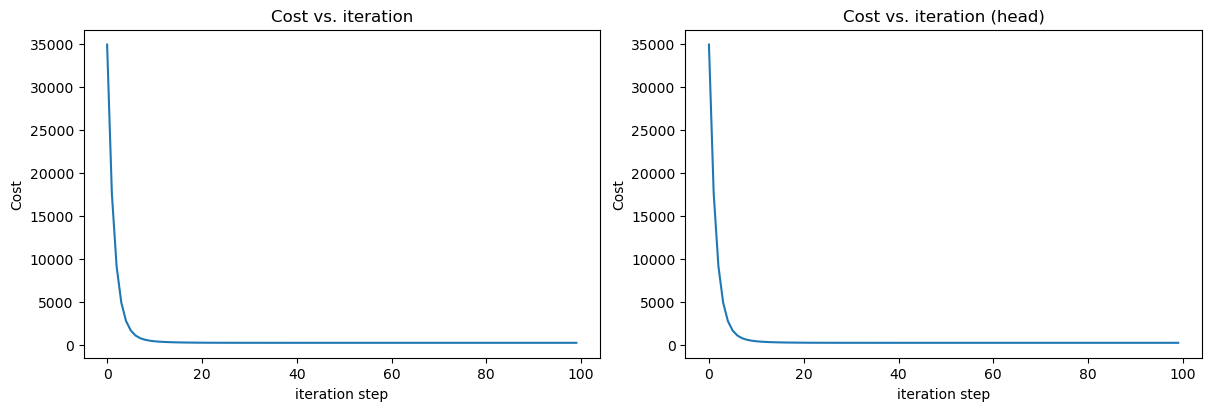

In [129]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(np.arange(len(J_hist[:200])), J_hist[:200])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (head)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [135]:
# check accuracy against test set
y_pred = predict(X_test, w_final, b_final)
# accuracy threshold = $5,000
print(f'Accuracy: {np.mean(abs(y_pred - y_test) < 5):0.2f}')

Accuracy: 0.17
